<a href="https://colab.research.google.com/github/21-LAKSHMI/AI-AND-ML/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/KFC_Pondy_Bazaar_Reviews.csv')
display(df.head())

,Reviewer Name,Rating,Review Date,Review Text
0,Sheila,1,2021-01-15,Not satisfied with the taste.
1,Scott,5,2022-07-30,Food was delicious and hot!
2,James,4,2022-03-25,Portions are small for the price.
3,Kevin,3,2023-12-15,The place was dirty and unhygienic.
4,Nicole,5,2025-03-22,Burgers were soggy and cold.


**Reasoning**:
Display the first 5 rows and check for missing values in the dataframe.



In [2]:
display(df.head())
display(df.isnull().sum())

,Reviewer Name,Rating,Review Date,Review Text
0,Sheila,1,2021-01-15,Not satisfied with the taste.
1,Scott,5,2022-07-30,Food was delicious and hot!
2,James,4,2022-03-25,Portions are small for the price.
3,Kevin,3,2023-12-15,The place was dirty and unhygienic.
4,Nicole,5,2025-03-22,Burgers were soggy and cold.


,0
Reviewer Name,0
Rating,0
Review Date,0
Review Text,0


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

def preprocess_text(text):
    """
    Preprocesses text data by converting to lowercase, removing special characters,
    and tokenizing.
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and punctuation
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stop words (optional)
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return [] # Return an empty list for non-string inputs

df['cleaned_text'] = df['Review Text'].apply(preprocess_text)
display(df[['Review Text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Review Text,cleaned_text
0,Not satisfied with the taste.,"[satisfied, taste]"
1,Food was delicious and hot!,"[food, delicious, hot]"
2,Portions are small for the price.,"[portions, small, price]"
3,The place was dirty and unhygienic.,"[place, dirty, unhygienic]"
4,Burgers were soggy and cold.,"[burgers, soggy, cold]"


In [4]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score from cleaned text
def get_sentiment_score(cleaned_text_list):
    """
    Calculates the compound sentiment score for a list of cleaned text tokens.
    """
    if isinstance(cleaned_text_list, list):
        # Join the tokens back into a string
        text = ' '.join(cleaned_text_list)
        # Get the sentiment scores
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    else:
        return 0.0  # Return 0.0 for non-list inputs

# Apply the function to the 'cleaned_text' column
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment_score)

# Display the relevant columns
display(df[['Review Text', 'cleaned_text', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review Text,cleaned_text,sentiment_score
0,Not satisfied with the taste.,"[satisfied, taste]",0.4215
1,Food was delicious and hot!,"[food, delicious, hot]",0.5719
2,Portions are small for the price.,"[portions, small, price]",0.0000
3,The place was dirty and unhygienic.,"[place, dirty, unhygienic]",-0.4404
4,Burgers were soggy and cold.,"[burgers, soggy, cold]",0.0000


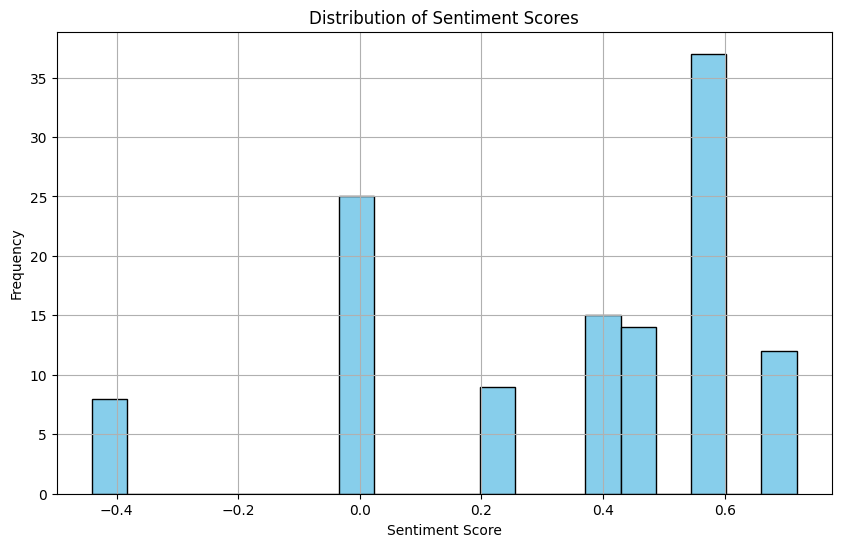

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
# Calculate the correlation matrix
correlation_matrix = df[['Rating', 'sentiment_score']].corr()

# Display the correlation between 'Rating' and 'sentiment_score'
print(correlation_matrix)

                   Rating  sentiment_score
Rating           1.000000         0.156309
sentiment_score  0.156309         1.000000


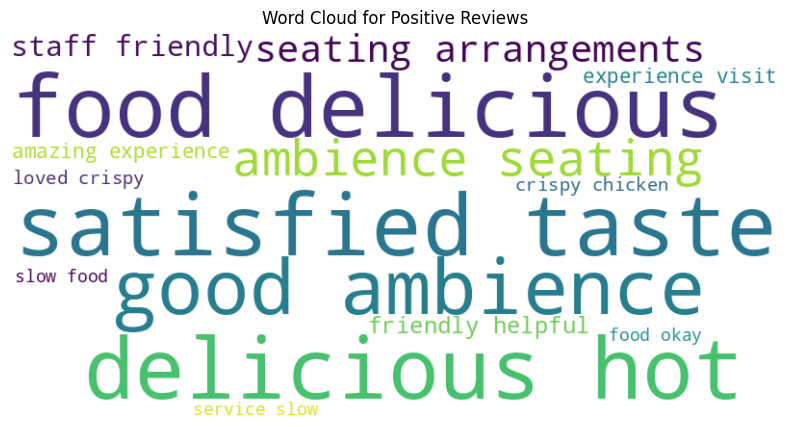

In [7]:
positive_reviews = df[df['sentiment_score'] > 0]
negative_reviews = df[df['sentiment_score'] <= 0]

positive_text = ' '.join([' '.join(tokens) for tokens in positive_reviews['cleaned_text']])

wordcloud_positive = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

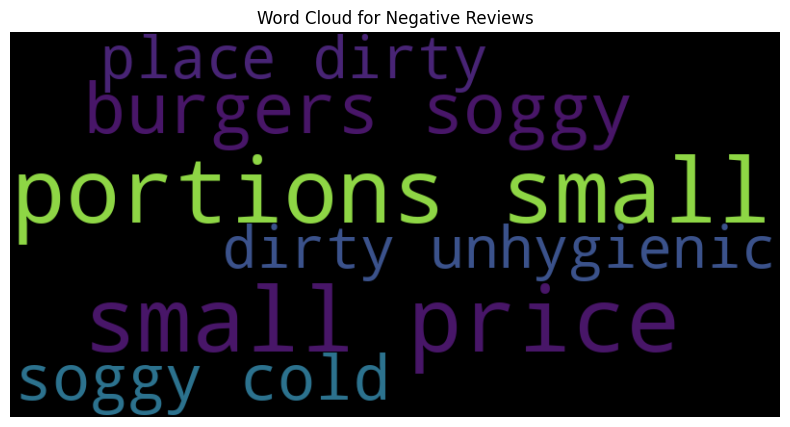

In [8]:
negative_text = ' '.join([' '.join(tokens) for tokens in negative_reviews['cleaned_text']])

wordcloud_negative = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()